# Week10 Regression

Regression models are used to predict a continuous value. Predicting prices of a house given the features of house like size, price etc is one of the common examples of Regression. It is a supervised technique.

In week10, we've covered various types of Regression:
* **Simple Linear Regression**
* **Polynomial Regression**
* **Decision Tree Regression**
* **Random Forest Regression**

The best way to consolidate the knowledge in your mind is by practicing.<br>Please complete the part marked with <span style="color:green">**# TODO**</span>.

[Google](www.google.com), [Python Documentation](https://docs.python.org/3/contents.html), and [scikit-learn Documentation](https://scikit-learn.org/stable/) are your good friends if you have any python questions.

Download **Week10_regression.ipynb** notebook to your local folder and open it with Jupyter Notebook.

### Initializing Packages and Importing Data

Install Python SciPy libraries (ex. `numpy`, `pandas`, `matplotlib`, `seaborn`)
    

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
!ls /content/drive/My\ Drive/'Colab Notebooks'

 bigmart_data.csv
'Copy of Copy of Untitled3 (1).ipynb'
'Copy of Copy of Untitled3.ipynb'
'Copy of Copy of Week4_PythonProgramming_Homework.ipynb'
'Copy of Copy of Week5_PythonProgramming_Homework1.ipynb'
'Copy of tensorboard.ipynb'
'Copy of Untitled3.ipynb'
'Copy of Untitled4.ipynb'
'Copy of Week09_unsupervised-learning.ipynb'
'Copy of Week3_PythonProgramming_Homework (1).ipynb'
'Copy of Week3_PythonProgramming_Homework.ipynb'
'Copy of Week4_PythonProgramming_Homework (1).ipynb'
'Copy of Week4_PythonProgramming_Homework (2).ipynb'
'Copy of Week4_PythonProgramming_Homework (3).ipynb'
'Copy of Week4_PythonProgramming_Homework (4).ipynb'
'Copy of Week4_PythonProgramming_Homework.ipynb'
'Copy of Week5_PythonProgramming_Homework (1).ipynb'
'Copy of Week5_PythonProgramming_Homework1.ipynb'
'Copy of Week5_PythonProgramming_Homework.ipynb'
'Copy of Week6_intro_to_visualization.ipynb'
'Copy of Week8_LogisticRegression_Homework.ipynb'
'Copy of Welcome To Colaboratory'
'Copy of Welcome To Colabo

In [0]:
# TODO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # Ignores any warning


Load Data

![bigmart.png](attachment:bigmart.png)

In [ ]:
#data = pd.read_csv("bigmart_data.csv") 
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/bigmart_data.csv") 
data.head()
data.info()
data.describe()

In [0]:
# TODO



Exploratory Data Analysis (EDA)
1. Univariate Distribution (Numerical and Categorical Variables)
2. Bivariate Distribution
3. Correlation Analysis


Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

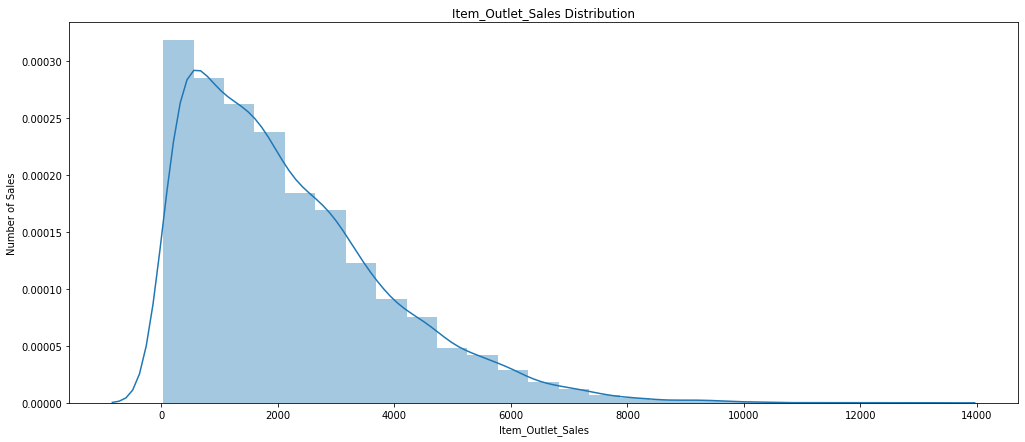

In [61]:
# TODO
plt.figure(figsize=(17,7))
sns.distplot(data.Item_Outlet_Sales, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")


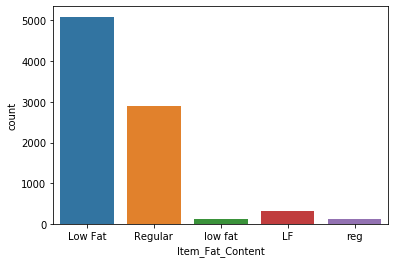

In [62]:
data.Item_Fat_Content.value_counts()
sns.countplot(data.Item_Fat_Content)


### Data Preprocessing

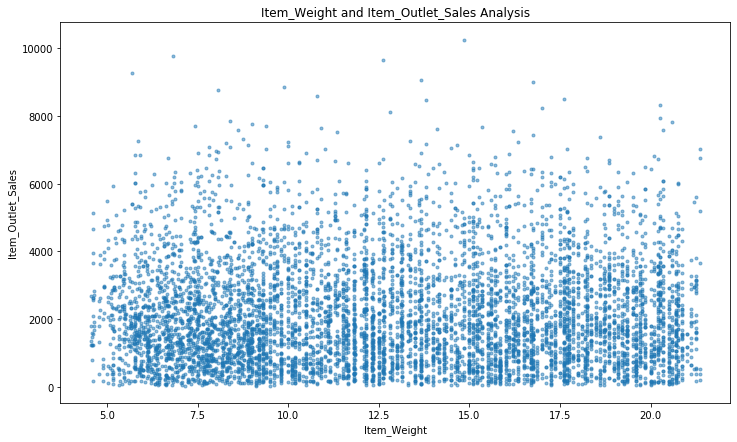

In [63]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(data.Item_Weight, data["Item_Outlet_Sales"],'.', alpha = 0.5)

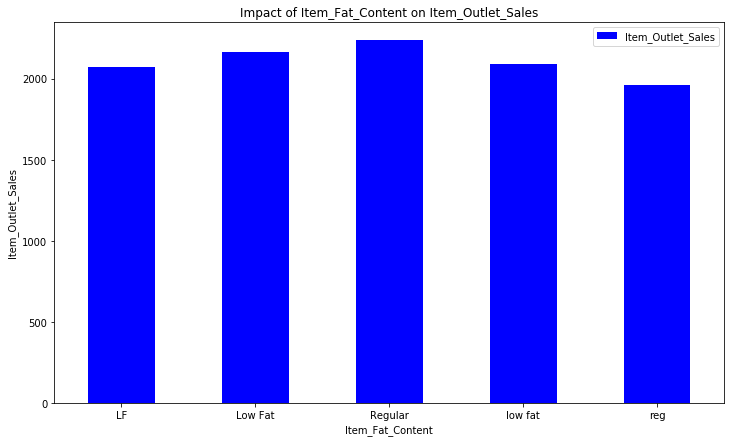

In [64]:
Item_Fat_Content_pivot = \
data.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.average)

Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

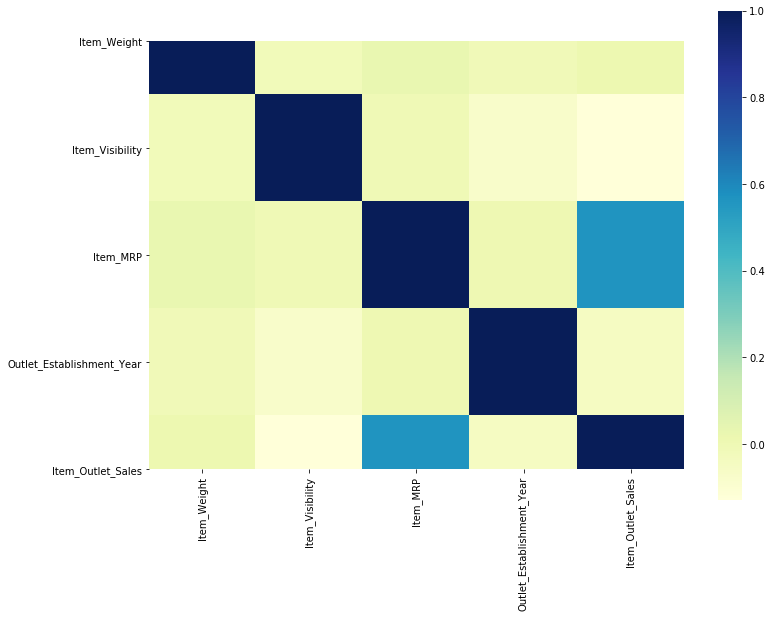

In [65]:
#Exactly –1. A perfect downhill (negative) linear relationship

#–0.70. A strong downhill (negative) linear relationship

#–0.50. A moderate downhill (negative) relationship

#–0.30. A weak downhill (negative) linear relationship

#0. No linear relationship
#+0.30. A weak uphill (positive) linear relationship

#+0.50. A moderate uphill (positive) relationship

#+0.70. A strong uphill (positive) linear relationship

#Exactly +1. A perfect uphill (positive) linear relationship

numeric_features = data.select_dtypes(include=[np.number])
corr = numeric_features.corr()
#numeric_features 
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=1, square=True, cmap="YlGnBu");

Look for missing values

In [66]:
# TODO
data.info()
#Item weight is 7060 out of 8523
#Item Outlet_zize is 6113 out of 8523
#Key in the mean and media for these columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Impute missing values

In [67]:
# TODO
data['Item_Weight'].fillna((data['Item_Weight'].mean()), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [68]:
data['Outlet_Size'].fillna((data['Outlet_Size'].mode()), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Feature engineering -- examine each column, perform necessary steps to prepare your data before modeling

In [69]:
# TODO
#Determine the years of operation of a store
data['Outlet_Years'] = 2019 - data['Outlet_Establishment_Year']
data['Outlet_Years']
data['Outlet_Years'].describe()

count    8523.000000
mean       21.168133
std         8.371760
min        10.000000
25%        15.000000
50%        20.000000
75%        32.000000
max        34.000000
Name: Outlet_Years, dtype: float64

Encode categorical variables (dummy variables)

In [70]:
# TODO;
data.groupby(['Item_Type']).count()
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0::2])
data.groupby(['Item_Type_Combined','Item_Type']).count()


,,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Years
Item_Type_Combined,Item_Type,,,,,,,,,,,,
DA2,Soft Drinks,6,6,6,6,6,6,6,3,6,6,6,6
DA4,Soft Drinks,7,7,7,7,7,7,7,5,7,7,7,7
DA9,Soft Drinks,8,8,8,8,8,8,8,6,8,8,8,8
DB1,Soft Drinks,3,3,3,3,3,3,3,3,3,3,3,3
DB3,Soft Drinks,5,5,5,5,5,5,5,3,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
NZ5,Health and Hygiene,3,3,3,3,3,3,3,3,3,3,3,3
NZ6,Household,7,7,7,7,7,7,7,6,7,7,7,7
NZ7,Health and Hygiene,6,6,6,6,6,6,6,3,6,6,6,6


In [71]:
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Series([], Name: Item_Type_Combined, dtype: int64)

In [72]:
#Change categories of low fat:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

print(data['Item_Fat_Content'].value_counts())


Original Categories:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [75]:
# TODO
#Dummy Variables:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined'])

data.dtypes

Item_Identifier                   object
Item_Weight                      float64
Item_Visibility                  float64
Item_Type                         object
Item_MRP                         float64
Outlet_Identifier                 object
Outlet_Establishment_Year          int64
Item_Outlet_Sales                float64
Outlet_Years                       int64
Item_Fat_Content_Low Fat           uint8
Item_Fat_Content_Regular           uint8
Outlet_Location_Type_Tier 1        uint8
Outlet_Location_Type_Tier 2        uint8
Outlet_Location_Type_Tier 3        uint8
Outlet_Size_High                   uint8
Outlet_Size_Medium                 uint8
Outlet_Size_Small                  uint8
Outlet_Type_Grocery Store          uint8
Outlet_Type_Supermarket Type1      uint8
Outlet_Type_Supermarket Type2      uint8
Outlet_Type_Supermarket Type3      uint8
dtype: object

In [0]:
Split to training set and testing set (Note: test_size = 0.25, random_state = 42)

### Modeling

Split to training set and testing set (Note: test_size = 0.25, random_state = 42)

In [0]:
# TODO
from sklearn import datasets
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.25, random_state = 42)


Define target and predictors (Drop `Item_Identifier` and `Outlet_Identifier`)

In [0]:
# TODO
# TODO
X_train = train.drop('Item_Outlet_Sales',1)
X_test = test.drop('Item_Outlet_Sales',1)
y_train = train['Item_Outlet_Sales']
y_test = test['Item_Outlet_Sales']


#### Linear Regression

Fit a linear model

In [0]:
# TODO
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)
LR = LR.fit(X_train, y_train)

In [0]:
data.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)

In [0]:
# TODO
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)
LR = LR.fit(X_train, y_train)


Look at estimated intercept and coefficients

In [82]:
# Todo
coef_lr = pd.Series(LR.coef_,X_train.columns).sort_values()
coef_lr


Outlet_Type_Grocery Store       -6.178474e+16
Outlet_Type_Supermarket Type2   -6.178474e+16
Outlet_Type_Supermarket Type1   -6.178474e+16
Outlet_Type_Supermarket Type3   -6.178474e+16
Item_Visibility                 -6.616059e+02
Outlet_Years                    -2.571358e+01
Item_Weight                      1.044792e+00
Item_MRP                         1.577881e+01
Outlet_Size_Small                1.499170e+02
Outlet_Size_Medium               1.934222e+02
Outlet_Size_High                 7.484116e+02
Item_Fat_Content_Low Fat         3.208026e+15
Item_Fat_Content_Regular         3.208026e+15
Outlet_Location_Type_Tier 3      5.665243e+15
Outlet_Location_Type_Tier 2      5.665243e+15
Outlet_Location_Type_Tier 1      5.665243e+15
dtype: float64

In [83]:
# Todo
LR.intercept_


5.291147475294088e+16

Make predictions on test dataset and plot the true outcome compared to the predicted outcome

Calculate the residual sum of squares and mean squared error

In [0]:
# Todo
y_pred = LR.predict(X_test)

In [85]:
# Todo
from sklearn import model_selection, metrics
rss = np.sum((y_pred - y_test)**2)
print('rss: ', rss)
mse=np.mean((y_pred - y_test)**2)
print('mse: ', mse)


rss:  2533910495.081645
mse:  1189071.0910753866


We've learned that there are some caveats in the train/test split method. In order to avoid this, we can perform something called cross validation. Try K-Fold Cross Validation (ex. 5-fold)

In [86]:
# Todo
X=data.drop('Item_Outlet_Sales',1)
y=data['Item_Outlet_Sales']
from sklearn import model_selection
kf = model_selection.KFold(n_splits=5)
lr = LinearRegression()
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    rss = np.sum((y_pred - y_test)**2)
    print('rss: ', rss)
    mse=np.mean((y_pred - y_test)**2)
    print('mse: ', mse)


rss:  2258464573.523327
mse:  1324612.6530928607
rss:  2130612475.834109
mse:  1249626.0855332029
rss:  2111687612.4222145
mse:  1238526.4588986605
rss:  2161603883.9106607
mse:  1268546.880229262
rss:  2211279310.7428217
mse:  1297699.1260227826


Plot coefficient graph

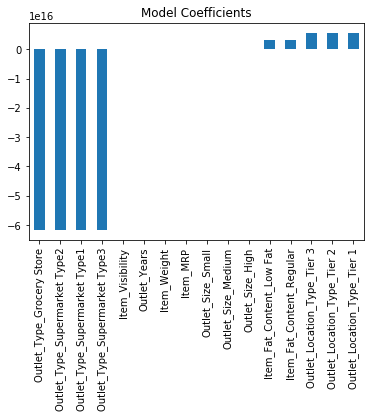

In [87]:
coef_lr.plot(kind='bar', title='Model Coefficients')

#### Regularized Linear Regression

If you look at the coefficients, they are very large in magnitude which signifies overfitting. To cater to this, lets use a ridge regression model.

In [88]:
# Todo

X_train = train.drop('Item_Outlet_Sales',1)
X_test = test.drop('Item_Outlet_Sales',1)
y_train = train['Item_Outlet_Sales']
y_test = test['Item_Outlet_Sales']

from sklearn.linear_model import Ridge, RidgeCV
rr=RidgeCV(alphas=np.array([0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 10]), normalize=True, scoring="neg_mean_squared_error", cv=5)
rr.fit(X_train,y_train)
rr.alpha_


0.001

In [89]:
# Todo
ridge = Ridge(alpha=rr.alpha_,normalize=True)
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
rss = np.sum((y_pred - y_test)**2)
print('rss: ', rss)
mse=np.mean((y_pred - y_test)**2)
print('mse: ', mse)


rss:  2530221911.847323
mse:  1187340.1744942842


There are so many predictors in the regression model. Can you use a lasso model to apply feature selection?

In [90]:
# Todo
from sklearn.linear_model import Lasso, LassoCV
lassocv=LassoCV(alphas=np.array([0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 10]), normalize=True, cv=5)
lassocv.fit(X_train,y_train)
lassocv.alpha_

0.001

What are some differences between ridge and lasso, when should we proceed to use each?

In [91]:
# Todo
lasso = Lasso(alpha=lassocv.alpha_,normalize=True)
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_test)
rss = np.sum((y_pred - y_test)**2)
print('rss: ', rss)
mse=np.mean((y_pred - y_test)**2)
print('mse: ', mse)

rss:  2529835137.758169
mse:  1187158.6756256083


## Submission

Commit your completed **Week10_regression.ipynb** notebook to your personal Github repo you shared with the faculty.